In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import median_abs_deviation

In [2]:
# def is_outlier(adata, metric: str, nmads: int):
#     M = adata.obs[metric]
#     outlier = (M < np.median(M) - nmads * median_abs_deviation(M)) | (
#         np.median(M) + nmads * median_abs_deviation(M) < M
#     )
#     return outlier

# read in data

In [2]:
adata = sc.read_h5ad('../merge_2022-23_scdata/7.seurat_obj.h5ad')

adata.obs['clusters'] = pd.Categorical(adata.obs['seurat_clusters'])
adata.obs['sp'] = adata.obs.index.map(lambda x: 'midgut rep1' if x.split('_')[1] == '1' else 'midgut rep2')

# add doublet info
adata.obs['doublet_detect'] = adata.obs.apply(
    lambda x: x['DF.classifications_0.25_0.09_181'] if x['DF.classifications_0.25_0.09_181'] != 'NA' else x['DF.classifications_0.25_0.09_117'],
    axis=1
)

adata

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/anndata/compat/__init__.py:229: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  warn(


AnnData object with n_obs × n_vars = 7445 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.9', 'seurat_clusters', 'pANN_0.25_0.09_181', 'DF.classifications_0.25_0.09_181', 'pANN_0.25_0.09_117', 'DF.classifications_0.25_0.09_117', 'integrated_snn_res.0.5', 'clusters', 'sp', 'doublet_detect'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [3]:
len(adata.obs[adata.obs['DF.classifications_0.25_0.09_181'] == 'Singlet'])

4350

In [4]:
len(adata.obs[adata.obs['DF.classifications_0.25_0.09_117'] == 'Singlet'])

2797

In [3]:
adata_sgl = adata[adata.obs['doublet_detect'] == 'Singlet']

adata_sgl.obs['batch'] = adata_sgl.obs.index.map(lambda x: f'batch_' + x.split('_')[1])

adata_sgl

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/tmp/ipykernel_5181/1672644257.py:3: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_sgl.obs['batch'] = adata_sgl.obs.index.map(lambda x: f'batch_' + x.split('_')[1])


AnnData object with n_obs × n_vars = 7147 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'RNA_snn_res.0.9', 'seurat_clusters', 'pANN_0.25_0.09_181', 'DF.classifications_0.25_0.09_181', 'pANN_0.25_0.09_117', 'DF.classifications_0.25_0.09_117', 'integrated_snn_res.0.5', 'clusters', 'sp', 'doublet_detect', 'batch'
    var: 'features'
    uns: 'neighbors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances'

In [4]:
umap = pd.DataFrame(adata.obsm['X_umap'], columns=['umap1', 'umap2'], index=adata.obs.index)
umap

,umap1,umap2
AAACCCAAGACTGTTC-1_1,3.379480,2.601441
AAACCCAAGAGTGGCT-1_1,0.402304,11.421389
AAACCCAAGTGGAAAG-1_1,-0.876691,3.194429
AAACCCACAACACGTT-1_1,-1.775616,1.591653
AAACCCACACCTGTCT-1_1,-0.786488,-5.891837
...,...,...
TTTGATCCAGTGGCTC-1_2,3.004660,-0.028067
TTTGATCTCATGTCAG-1_2,2.764501,0.800248
TTTGGAGCAATCGAAA-1_2,0.214418,2.020563
TTTGGAGGTTCCTACC-1_2,-3.459828,-0.623619


In [24]:
umap.to_csv('./umap.csv')

# replot

## QC

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


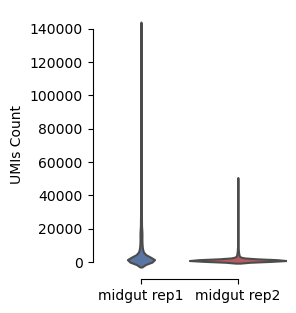

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=adata.obs['nCount_RNA'],
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('UMIs Count')
ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.umi.png', dpi=600, bbox_inches='tight')

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/tmp/ipykernel_5181/1633203027.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_ytick

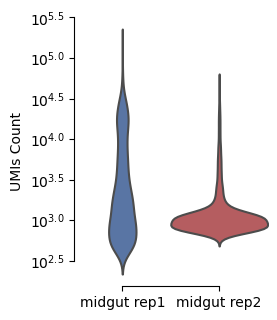

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=np.log10(adata.obs['nCount_RNA']),
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_yticklabels([r'$10^{' + str(i) + r'}$' for i in np.arange(2.5, 6, 0.5)])

ax.set_ylabel('UMIs Count')
ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.umi.log.png', dpi=600, bbox_inches='tight')

In [35]:
adata.obs.groupby(['sp'])['nCount_RNA'].mean()

sp
midgut rep1    5588.178989
midgut rep2    1695.132121
Name: nCount_RNA, dtype: float64

In [36]:
adata.obs.groupby(['sp'])['nCount_RNA'].median()

sp
midgut rep1    1637.0
midgut rep2    1009.0
Name: nCount_RNA, dtype: float64

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


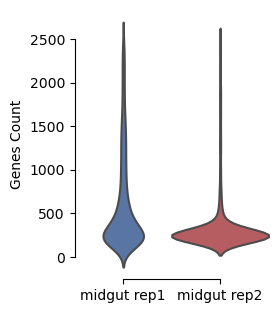

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=adata.obs['nFeature_RNA'],
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('Genes Count')
# ax.set_yticks([2, 2.5, 3, 3.5])

ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.rna.png', dpi=600, bbox_inches='tight')

In [38]:
adata.obs.groupby(['sp'])['nFeature_RNA'].mean()

sp
midgut rep1    608.754800
midgut rep2    353.334935
Name: nFeature_RNA, dtype: float64

In [37]:
adata.obs.groupby(['sp'])['nFeature_RNA'].median()

sp
midgut rep1    359.0
midgut rep2    251.0
Name: nFeature_RNA, dtype: float64

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


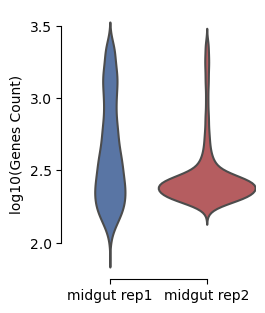

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=np.log10(adata.obs['nFeature_RNA']),
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('log10(Genes Count)')
ax.set_yticks([2, 2.5, 3, 3.5])

ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.rna.log.png', dpi=600, bbox_inches='tight')

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


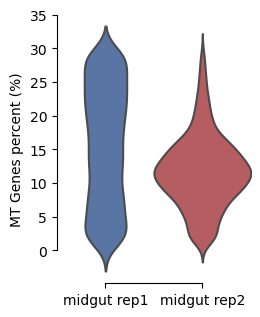

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['sp'], 
    y=adata.obs['percent.mt'],
    palette=[c[0], c[3]],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('MT Genes percent (%)')
ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)
plt.savefig('./plots/f1.qc.mtg.png', dpi=600, bbox_inches='tight')

## doublet

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


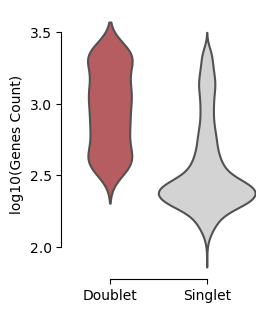

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(2.5, 3.5))

c = sns.color_palette('deep')

sns.violinplot(
    x=adata.obs['doublet_detect'], 
    y=np.log10(adata.obs['nFeature_RNA']),
    palette=[c[3], 'lightgrey'],
    order=['Doublet', 'Singlet'],
    inner=None,
    width=1,
    ax=ax
)

ax.set_ylabel('log10(Genes Count)')
ax.set_yticks([2, 2.5, 3, 3.5])

ax.set_xlabel('')

sns.despine(top=True, right=True, trim=100)

plt.savefig('./plots/f1.qc.doublet.png', dpi=600, bbox_inches='tight')

In [41]:
adata.obs['doublet_detect'].value_counts().to_dict()

{'Singlet': 7147, 'Doublet': 298}

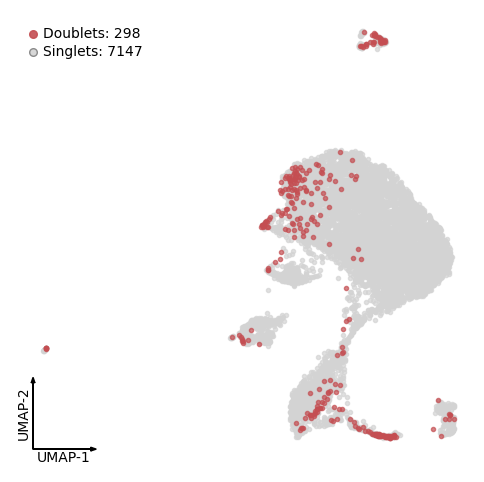

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

c = sns.color_palette('deep')

pdf = umap[adata.obs['doublet_detect'] == 'Singlet']
l1, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color='lightgrey', alpha=0.7) #e7e7e7

pdf = umap[adata.obs['doublet_detect'] == 'Doublet']
l2, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[3], alpha=0.7)

ax.arrow(
    -17, -10, 0, 3.5, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -17, -10, 3, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-15.4, -10.1, 'UMAP-1', ha='center', va='top')
ax.text(-17.1, -8.1, 'UMAP-2', ha='right', va='center', rotation=90)

doublet_ct_dct = adata.obs['doublet_detect'].value_counts().to_dict()

doublet_ct = doublet_ct_dct['Doublet']
ax.plot(-17, 12, '.', color=c[3], mec=c[3], ms=11, alpha=0.9)
ax.text(-16.5, 12, f'Doublets: {doublet_ct}', ha='left', va='center')

singlet_ct = doublet_ct_dct['Singlet']
ax.plot(-17, 11, '.', color='lightgrey', mec='grey', ms=11, alpha=0.9)
ax.text(-16.5, 11, f'Singlets: {singlet_ct}', ha='left', va='center')

plt.savefig('./plots/f1.qc.doublet.umap.png', dpi=600, bbox_inches='tight')

## batch

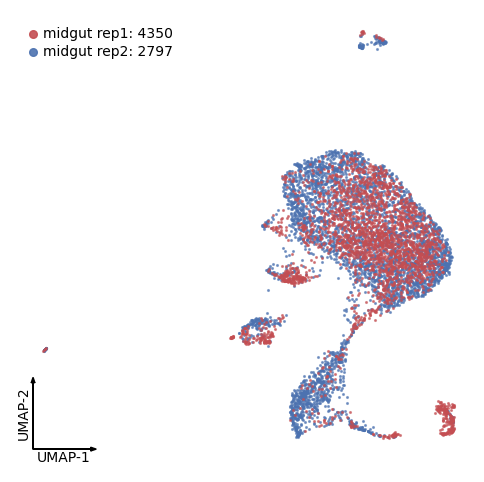

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

c = sns.color_palette('deep')

pdf = umap[
    umap.index.isin(adata_sgl.obs.index)
][adata_sgl.obs['sp'] == 'midgut rep1']

r1_ct = len(pdf)

l1, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[0], alpha=0.6, ms=2.5) #e7e7e7

pdf = umap[
    umap.index.isin(adata_sgl.obs.index)
][adata_sgl.obs['sp'] == 'midgut rep2']

r2_ct = len(pdf)

l2, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[3], alpha=0.6, ms=2.5)

ax.arrow(
    -17, -10, 0, 3.5, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -17, -10, 3, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-15.4, -10.1, 'UMAP-1', ha='center', va='top')
ax.text(-17.1, -8.1, 'UMAP-2', ha='right', va='center', rotation=90)

ax.plot(-17, 12, '.', color=c[3], mec=c[3], ms=11, alpha=0.9)
ax.text(-16.5, 12, f'midgut rep1: {r1_ct}', ha='left', va='center')

ax.plot(-17, 11, '.', color=c[0], mec=c[0], ms=11, alpha=0.9)
ax.text(-16.5, 11, f'midgut rep2: {r2_ct}', ha='left', va='center')

plt.savefig('./plots/f1.qc.rep.umap.png', dpi=600, bbox_inches='tight')

## umap

### marker genes

In [21]:
markg = pd.read_csv('/public21/home/sc90258/huangying/analysis/1.Aedes_scRNA-Seq/20231103_Aedes_midgut.2sp_rerun/scRNA_analysis/merge_2022-23_scdata/5.marker.genes.csv', index_col=0)

gene_des = pd.read_csv('/public21/home/sc90258/common/mosquito_genome/AaegyptiLVP_AGWG/2023-08-31/VectorBase-65_AaegyptiLVP_AGWG.gene_description.csv')

In [23]:
markg

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
AAEL003060,2.342625e-163,0.528828,1.000,1.000,4.685250e-160,0,AAEL003060
AAEL004798,7.361280e-35,0.326579,0.989,0.962,1.472256e-31,0,AAEL004798
AAEL014516,2.637414e-34,0.313436,0.996,0.976,5.274828e-31,0,AAEL014516
AAEL026466,2.150358e-22,0.370873,0.883,0.889,4.300717e-19,0,AAEL026466
AAEL022334,1.168097e-08,0.293052,0.751,0.851,2.336195e-05,0,AAEL022334
...,...,...,...,...,...,...,...
AAEL0036811,4.258855e-03,0.505331,0.345,0.190,1.000000e+00,12,AAEL003681
AAEL0080802,5.255984e-03,0.624386,0.517,0.399,1.000000e+00,12,AAEL008080
AAEL0200022,5.650774e-03,0.337567,0.276,0.140,1.000000e+00,12,AAEL020002
AAEL0128322,7.556485e-03,0.488839,0.379,0.225,1.000000e+00,12,AAEL012832


In [24]:
markg_des = markg.merge(gene_des, on='gene')

markg_des.to_csv('./markg_des.csv', index=False)
markg_des

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene,name,description
0,2.342625e-163,0.528828,1.000,1.000,4.685250e-160,0,AAEL003060,NaN,female-specific chymotrypsin
1,3.213023e-76,0.399394,1.000,1.000,6.426045e-73,1,AAEL003060,NaN,female-specific chymotrypsin
2,1.067761e-68,0.383775,1.000,1.000,2.135521e-65,2,AAEL003060,NaN,female-specific chymotrypsin
3,7.361280e-35,0.326579,0.989,0.962,1.472256e-31,0,AAEL004798,NaN,Mucin-like peritrophin [Source:UniProtKB/TrEMB...
4,1.960626e-87,0.469353,0.999,0.960,3.921252e-84,1,AAEL004798,NaN,Mucin-like peritrophin [Source:UniProtKB/TrEMB...
...,...,...,...,...,...,...,...,...,...
2441,4.178500e-05,0.532182,0.345,0.097,8.356999e-02,12,AAEL005206,NaN,c-terminal pdz ligand of neuronal nitric oxide...
2442,6.827231e-05,0.544572,0.276,0.076,1.365446e-01,12,AAEL009380,NaN,phospholipase c beta
2443,1.482200e-04,0.436444,0.379,0.172,2.964401e-01,12,AAEL008409,NaN,p15-2a protein%2C putative
2444,1.591325e-04,0.703260,0.414,0.207,3.182650e-01,12,AAEL012545,NaN,Proliferating cell nuclear antigen [Source:Uni...


In [25]:
mgd = pd.read_excel('./select_marker.xlsx')
mgd

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,seurat_clusters,gene,name,description,pub,label,order
0,1.664851e-34,2.609945,0.700,0.191,3.329702e-31,8,AAEL005255,PDP1,PAR-domain protein 1,https://pubmed.ncbi.nlm.nih.gov/9409684/,ISC/EB,0
1,3.543655e-39,2.121681,0.714,0.256,7.087311e-36,8,AAEL020559,STAT,JAK/STAT pathway signalling transcription factor,https://pubmed.ncbi.nlm.nih.gov/19563763/,ISC/EB,1
2,2.033201e-102,2.139408,0.934,0.303,4.066402e-99,9,AAEL002308,NaN,butyrate response factor 1 (TIS11B protein),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,ISC/EB-q,2
3,9.504814e-99,2.240301,0.925,0.397,1.900963e-95,9,AAEL003723,LYSC11,C-Type Lysozyme (Lys-A),NaN,ISC/EB-q,3
4,3.009902e-289,3.063359,0.958,0.440,6.019804e-286,4,AAEL008789,NaN,apolipophorin-III%2C putative,https://journals.aai.org/jimmunol/article/172/...,ISC/EB-d1,4
5,5.271523e-24,1.098397,0.601,0.471,1.054305e-20,5,AAEL008789,NaN,apolipophorin-III%2C putative,NaN,ISC/EB-d2,5
6,6.459240e-111,4.266168,0.841,0.353,1.291848e-107,7,AAEL004522,GAM1,gambicin anti-microbial peptide,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,EC-im,6
7,2.477955e-65,0.806310,0.861,0.545,1.068898e-50,3,AAEL006425,NaN,trypsin,NaN,EC-1,7
8,4.266135e-57,0.360858,0.632,0.374,8.532270e-54,2,AAEL001837,NaN,Lipase,NaN,EC-2,8
9,2.342625e-163,0.528828,1.000,1.000,4.685250e-160,0,AAEL003060,NaN,female-specific chymotrypsin,NaN,EC-3,9


In [26]:
dict(mgd[['seurat_clusters', 'label']].drop_duplicates().values)

{8: 'ISC/EB',
 9: 'ISC/EB-q',
 4: 'ISC/EB-d1',
 5: 'ISC/EB-d2',
 7: 'EC-im',
 3: 'EC-1',
 2: 'EC-2',
 0: 'EC-3',
 1: 'EC-trypsin 5G1',
 11: 'EC-AA',
 10: 'EE',
 6: 'VM',
 12: 'Unkn-im'}

In [27]:
clust_ord = {}

order = 0
last_lb = ''
for clust, lb in mgd[['seurat_clusters', 'label']].values:
    if lb != last_lb:
        order += 1
        last_lb = lb
        clust_ord[clust] = order
    else:
        clust_ord[clust] = order

clust_ord

{8: 1,
 9: 2,
 4: 3,
 5: 4,
 7: 5,
 3: 6,
 2: 7,
 0: 8,
 1: 9,
 11: 10,
 10: 11,
 6: 12,
 12: 13}

In [28]:
adata_sgl.obs['label'] = adata_sgl.obs['seurat_clusters'].map(lambda x: dict(mgd[['seurat_clusters', 'label']].values)[x])
adata_sgl.obs['order'] = adata_sgl.obs['seurat_clusters'].map(lambda x: clust_ord[x])
adata_sgl.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.9,seurat_clusters,pANN_0.25_0.09_181,DF.classifications_0.25_0.09_181,pANN_0.25_0.09_117,DF.classifications_0.25_0.09_117,integrated_snn_res.0.5,clusters,sp,doublet_detect,batch,label,order
AAACCCAAGACTGTTC-1_1,Aedes_midgut,543.0,158,24.055944,0,1,0.007353,Singlet,NaN,NA,1,1,midgut rep1,Singlet,batch_1,EC-trypsin 5G1,9
AAACCCAAGTGGAAAG-1_1,Aedes_midgut,2099.0,421,10.409556,3,6,0.292279,Singlet,NaN,NA,6,6,midgut rep1,Singlet,batch_1,VM,12
AAACCCACAACACGTT-1_1,Aedes_midgut,5941.0,626,10.658449,0,3,0.273897,Singlet,NaN,NA,3,3,midgut rep1,Singlet,batch_1,EC-1,6
AAACCCACACCTGTCT-1_1,Aedes_midgut,430.0,180,29.623568,2,5,0.079044,Singlet,NaN,NA,5,5,midgut rep1,Singlet,batch_1,ISC/EB-d2,4
AAACCCACATTGACAC-1_1,Aedes_midgut,15243.0,1488,6.951480,4,3,0.373162,Singlet,NaN,NA,3,3,midgut rep1,Singlet,batch_1,EC-1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCAGTGGCTC-1_2,Aedes_midgut,807.0,210,10.099889,1,0,NaN,NA,0.002857,Singlet,0,0,midgut rep2,Singlet,batch_2,EC-3,8
TTTGATCTCATGTCAG-1_2,Aedes_midgut,1022.0,237,14.464883,1,0,NaN,NA,0.000000,Singlet,0,0,midgut rep2,Singlet,batch_2,EC-3,8
TTTGGAGCAATCGAAA-1_2,Aedes_midgut,1032.0,247,8.833922,0,2,NaN,NA,0.002857,Singlet,2,2,midgut rep2,Singlet,batch_2,EC-2,7
TTTGGAGGTTCCTACC-1_2,Aedes_midgut,1120.0,275,14.569031,2,7,NaN,NA,0.054286,Singlet,7,7,midgut rep2,Singlet,batch_2,EC-im,5


In [29]:
ord_markers = []
for i in mgd['gene']:
    for m in i.split(', '):
        if not m in ord_markers:
            ord_markers.append(m)
            
ord_markers

['AAEL005255',
 'AAEL020559',
 'AAEL002308',
 'AAEL003723',
 'AAEL008789',
 'AAEL004522',
 'AAEL006425',
 'AAEL001837',
 'AAEL003060',
 'AAEL013712',
 'AAEL008424',
 'AAEL002733',
 'AAEL019799',
 'AAEL008658']

In [177]:
# ord_markers = [
#     'LOC5567214',
#     'LOC5571084',
#     'LOC5574966',
#     'LOC110676293', 'LOC5563695',
#     'LOC5570613', 
#     'LOC5564333', 'LOC5570922',
#     'LOC5568583',
#     'LOC5571828',
#     'LOC5567964',
#     'LOC5565453',
#     'LOC5573874', 'LOC5575886',
#     'LOC5580173', 'LOC5580231', 'LOC5580168',    
# ]

In [30]:
markn = mgd[['gene', 'name', 'description']]
markn['gname'] = markn.apply(lambda x: x['gene'] if pd.isna(x['name']) else x['name'], axis=1)
markn

/tmp/ipykernel_5181/3622808890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  markn['gname'] = markn.apply(lambda x: x['gene'] if pd.isna(x['name']) else x['name'], axis=1)


,gene,name,description,gname
0,AAEL005255,PDP1,PAR-domain protein 1,PDP1
1,AAEL020559,STAT,JAK/STAT pathway signalling transcription factor,STAT
2,AAEL002308,NaN,butyrate response factor 1 (TIS11B protein),AAEL002308
3,AAEL003723,LYSC11,C-Type Lysozyme (Lys-A),LYSC11
4,AAEL008789,NaN,apolipophorin-III%2C putative,AAEL008789
5,AAEL008789,NaN,apolipophorin-III%2C putative,AAEL008789
6,AAEL004522,GAM1,gambicin anti-microbial peptide,GAM1
7,AAEL006425,NaN,trypsin,AAEL006425
8,AAEL001837,NaN,Lipase,AAEL001837
9,AAEL003060,NaN,female-specific chymotrypsin,AAEL003060


In [31]:
markn.to_csv('./marker_genes.des.csv')

In [32]:
len(ord_markers)

14

In [33]:
labels = list(adata_sgl.obs[['order', 'label']].drop_duplicates().sort_values(['order'])['label'])
labels

['ISC/EB',
 'ISC/EB-q',
 'ISC/EB-d1',
 'ISC/EB-d2',
 'EC-im',
 'EC-1',
 'EC-2',
 'EC-3',
 'EC-trypsin 5G1',
 'EC-AA',
 'EE',
 'VM',
 'Unkn-im']

In [34]:
adata_sgl.obs['order'] = pd.Categorical(adata_sgl.obs['order'])

In [35]:
markn['gname'].drop_duplicates()

0           PDP1
1           STAT
2     AAEL002308
3         LYSC11
4     AAEL008789
6           GAM1
7     AAEL006425
8     AAEL001837
9     AAEL003060
10    AAEL013712
11    AAEL008424
12           NPF
13    AAEL019799
14        LRIM16
Name: gname, dtype: object

/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:168: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  obs_bool.groupby(level=0).sum() / obs_bool.groupby(level=0).count()
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:178: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dot_color_df = self.obs_tidy.groupby(level=0).mean()
/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:748: UserWarning: No data for colormapping provided via 'c'. Parameters 'cm

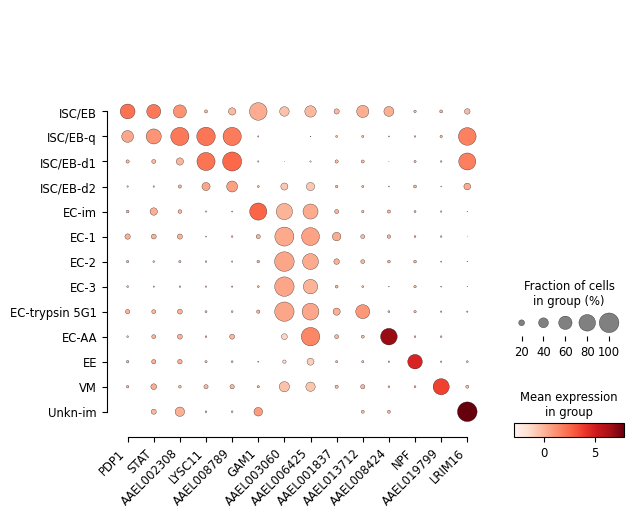

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sc.pl.dotplot(
    adata_sgl, 
    ['AAEL005255', 'AAEL020559', 'AAEL002308', 'AAEL003723', 'AAEL008789', 'AAEL004522', 'AAEL003060', 'AAEL006425', 'AAEL001837', 'AAEL013712', 'AAEL008424', 'AAEL002733', 'AAEL019799', 'AAEL008658'], 
    groupby='order',
    use_raw=False, 
    dendrogram=False,
    # cmap='Blues',
    show=False,
)

axm = ax['mainplot_ax']

axm.set_xticklabels(['PDP1', 'STAT', 'AAEL002308', 'LYSC11', 'AAEL008789', 'GAM1', 'AAEL003060', 'AAEL006425', 'AAEL001837', 'AAEL013712', 'AAEL008424', 'NPF', 'AAEL019799', 'LRIM16'], rotation=45, ha='right')
axm.set_yticklabels(labels)

sns.despine(top=True, right=True, trim=1, ax=axm)

plt.savefig('./plots/f2.dotplot.png', dpi=600, bbox_inches='tight')

In [73]:
adata_sgl.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.9,seurat_clusters,pANN_0.25_0.09_181,DF.classifications_0.25_0.09_181,pANN_0.25_0.09_117,DF.classifications_0.25_0.09_117,integrated_snn_res.0.5,clusters,sp,doublet_detect,batch,label,order
AAACCCAAGACTGTTC-1_1,Aedes_midgut,543.0,158,24.055944,0,1,0.007353,Singlet,NaN,NA,1,1,midgut rep1,Singlet,batch_1,EC-trypsin 5G1,9
AAACCCAAGTGGAAAG-1_1,Aedes_midgut,2099.0,421,10.409556,3,6,0.292279,Singlet,NaN,NA,6,6,midgut rep1,Singlet,batch_1,VM,12
AAACCCACAACACGTT-1_1,Aedes_midgut,5941.0,626,10.658449,0,3,0.273897,Singlet,NaN,NA,3,3,midgut rep1,Singlet,batch_1,EC-1,6
AAACCCACACCTGTCT-1_1,Aedes_midgut,430.0,180,29.623568,2,5,0.079044,Singlet,NaN,NA,5,5,midgut rep1,Singlet,batch_1,ISC/EB-d2,4
AAACCCACATTGACAC-1_1,Aedes_midgut,15243.0,1488,6.951480,4,3,0.373162,Singlet,NaN,NA,3,3,midgut rep1,Singlet,batch_1,EC-1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGATCCAGTGGCTC-1_2,Aedes_midgut,807.0,210,10.099889,1,0,NaN,NA,0.002857,Singlet,0,0,midgut rep2,Singlet,batch_2,EC-3,8
TTTGATCTCATGTCAG-1_2,Aedes_midgut,1022.0,237,14.464883,1,0,NaN,NA,0.000000,Singlet,0,0,midgut rep2,Singlet,batch_2,EC-3,8
TTTGGAGCAATCGAAA-1_2,Aedes_midgut,1032.0,247,8.833922,0,2,NaN,NA,0.002857,Singlet,2,2,midgut rep2,Singlet,batch_2,EC-2,7
TTTGGAGGTTCCTACC-1_2,Aedes_midgut,1120.0,275,14.569031,2,7,NaN,NA,0.054286,Singlet,7,7,midgut rep2,Singlet,batch_2,EC-im,5


### plot umap

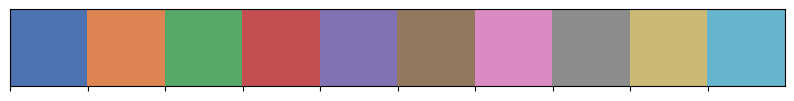

In [50]:
sns.palplot(sns.color_palette('deep'))

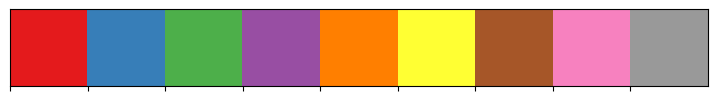

In [36]:
sns.palplot(sns.color_palette('Set1'))

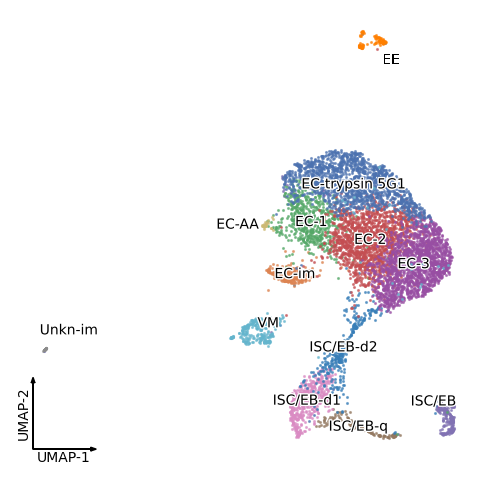

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns

fig, ax = plt.subplots(figsize=(6, 6))

c = sns.color_palette('deep')
set1 = sns.color_palette('Set1')

grp_color = {
    'ISC/EB': c[4],
    'ISC/EB-q': c[5],
    'ISC/EB-d1': c[6],
    'ISC/EB-d2': set1[1],
    'EC-AA': c[-2],
    'EC-im': c[1],
    'EC-1': c[2],
    'EC-trypsin 5G1': c[0],
    'EC-2': c[3],
    'EC-3': set1[3],
    'EE': set1[4],
    'VM': c[-1],
    'Unkn-im': c[-3],
}

for lb in labels:
    pdf = umap[
        umap.index.isin(adata_sgl.obs.index)
    ][adata_sgl.obs['label'] == lb]
    l1, = ax.plot(
        pdf['umap1'], pdf['umap2'], '.', color=grp_color[lb],
        alpha=0.6, ms=2.5) #e7e7e7

    x, y = np.mean(pdf[['umap1', 'umap2']].values, axis=0)
    
    if lb == 'EE':
        txt = ax.text(x + 1, y - 1, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    elif lb == 'Unkn-im':
        txt = ax.text(x + 1.25, y + 1, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    elif lb == 'EC-AA':
        txt = ax.text(x - 1.5, y, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    else:
        txt = ax.text(x, y, lb, ha='center', va='center')
        txt.set_path_effects([
            PathEffects.withStroke(linewidth=2, foreground='w')])
    

# pdf = umap[
#     umap.index.isin(adata_sgl.obs.index)
# ][adata_sgl.obs['sp'] == 'midgut 10d']
# l2, = ax.plot(pdf['umap1'], pdf['umap2'], '.', color=c[3], alpha=0.6, ms=2.5)

ax.arrow(
    -17, -10, 0, 3.5, 
    width=0.01, head_width=0.2, overhang=0.3, 
    color='k', zorder=10)
ax.arrow(
    -17, -10, 3, 0, 
    width=0.01, head_width=0.2, overhang=0.3,
    color='k', zorder=10)

ax.set_axis_off()

ax.text(-15.4, -10.1, 'UMAP-1', ha='center', va='top')
ax.text(-17.1, -8.1, 'UMAP-2', ha='right', va='center', rotation=90)



# ax.plot(-12, 9, '.', color=c[0], mec=c[0], ms=11, alpha=0.9)
# ax.text(-11.5, 9, 'midgut 10d', ha='left', va='center')

plt.savefig('./plots/f2.clust.umap.png', dpi=600, bbox_inches='tight')

### plot annotation umap

In [17]:
markn = pd.read_csv('./marker_genes.des.csv', index_col=0)
markn

,gene,name,description,gname
0,AAEL005255,PDP1,PAR-domain protein 1,PDP1
1,AAEL020559,STAT,JAK/STAT pathway signalling transcription factor,STAT
2,AAEL002308,NaN,butyrate response factor 1 (TIS11B protein),AAEL002308
3,AAEL003723,LYSC11,C-Type Lysozyme (Lys-A),LYSC11
4,AAEL008789,NaN,apolipophorin-III%2C putative,AAEL008789
5,AAEL008789,NaN,apolipophorin-III%2C putative,AAEL008789
6,AAEL004522,GAM1,gambicin anti-microbial peptide,GAM1
7,AAEL009244,NaN,serine-type enodpeptidase%2C,AAEL009244
8,AAEL001837,NaN,Lipase,AAEL001837
9,AAEL003060,NaN,female-specific chymotrypsin,AAEL003060


In [11]:
mgd = pd.read_excel('./select_marker.xlsx')
mgd

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,seurat_clusters,gene,name,description,pub,label,order
0,1.664851e-34,2.609945,0.700,0.191,3.329702e-31,8,AAEL005255,PDP1,PAR-domain protein 1,https://pubmed.ncbi.nlm.nih.gov/9409684/,ISC/EB,0
1,3.543655e-39,2.121681,0.714,0.256,7.087311e-36,8,AAEL020559,STAT,JAK/STAT pathway signalling transcription factor,https://pubmed.ncbi.nlm.nih.gov/19563763/,ISC/EB,1
2,2.033201e-102,2.139408,0.934,0.303,4.066402e-99,9,AAEL002308,NaN,butyrate response factor 1 (TIS11B protein),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,ISC/EB-q,2
3,9.504814e-99,2.240301,0.925,0.397,1.900963e-95,9,AAEL003723,LYSC11,C-Type Lysozyme (Lys-A),NaN,ISC/EB-q,3
4,3.009902e-289,3.063359,0.958,0.440,6.019804e-286,4,AAEL008789,NaN,apolipophorin-III%2C putative,https://journals.aai.org/jimmunol/article/172/...,ISC/EB-d1,4
5,5.271523e-24,1.098397,0.601,0.471,1.054305e-20,5,AAEL008789,NaN,apolipophorin-III%2C putative,NaN,ISC/EB-d2,5
6,6.459240e-111,4.266168,0.841,0.353,1.291848e-107,7,AAEL004522,GAM1,gambicin anti-microbial peptide,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6...,EC-im,6
7,2.477955e-65,0.806310,0.861,0.545,4.955911e-62,3,AAEL009244,NaN,serine-type enodpeptidase%2C,NaN,EC-1,7
8,4.266135e-57,0.360858,0.632,0.374,8.532270e-54,2,AAEL001837,NaN,Lipase,NaN,EC-2,8
9,2.342625e-163,0.528828,1.000,1.000,4.685250e-160,0,AAEL003060,NaN,female-specific chymotrypsin,NaN,EC-3,9


In [18]:
markn[markn['gname'].map(lambda x: not x in ['AAEL009244', 'AAEL001837'])].drop_duplicates()

,gene,name,description,gname
0,AAEL005255,PDP1,PAR-domain protein 1,PDP1
1,AAEL020559,STAT,JAK/STAT pathway signalling transcription factor,STAT
2,AAEL002308,NaN,butyrate response factor 1 (TIS11B protein),AAEL002308
3,AAEL003723,LYSC11,C-Type Lysozyme (Lys-A),LYSC11
4,AAEL008789,NaN,apolipophorin-III%2C putative,AAEL008789
6,AAEL004522,GAM1,gambicin anti-microbial peptide,GAM1
9,AAEL003060,NaN,female-specific chymotrypsin,AAEL003060
10,AAEL013712,NaN,trypsin 5G1 Precursor (EC 3.4.21.4),AAEL013712
11,AAEL008424,NaN,sodium/chloride dependent amino acid transporter,AAEL008424
12,AAEL002733,NPF,neuropeptide F Precursor (NPF),NPF


In [19]:
marks = markn[markn['gname'].map(lambda x: not x in ['AAEL009244', 'AAEL001837'])].drop_duplicates()
marks['grp'] = ['ISC/EB', 'ISC/EB', 'ISC/EB-q', 'ISC/EB-d', 'ISC/EB-d', 'EC-im', 'EC', 'EC-trypsin 5G1', 'EC-AA', 'EE', 'VM', 'Unkn-im']
marks['title'] = marks.apply(lambda x: x['gene'] + ' (' + x['grp'] + ')', axis=1)
marks['des'] = marks.apply(lambda x: 'Gene Name: ' + x['gname'] + '\nDescription:\n' + x['description'], axis=1)
marks

,gene,name,description,gname,grp,title,des
0,AAEL005255,PDP1,PAR-domain protein 1,PDP1,ISC/EB,AAEL005255 (ISC/EB),Gene Name: PDP1\nDescription:\nPAR-domain prot...
1,AAEL020559,STAT,JAK/STAT pathway signalling transcription factor,STAT,ISC/EB,AAEL020559 (ISC/EB),Gene Name: STAT\nDescription:\nJAK/STAT pathwa...
2,AAEL002308,NaN,butyrate response factor 1 (TIS11B protein),AAEL002308,ISC/EB-q,AAEL002308 (ISC/EB-q),Gene Name: AAEL002308\nDescription:\nbutyrate ...
3,AAEL003723,LYSC11,C-Type Lysozyme (Lys-A),LYSC11,ISC/EB-d,AAEL003723 (ISC/EB-d),Gene Name: LYSC11\nDescription:\nC-Type Lysozy...
4,AAEL008789,NaN,apolipophorin-III%2C putative,AAEL008789,ISC/EB-d,AAEL008789 (ISC/EB-d),Gene Name: AAEL008789\nDescription:\napolipoph...
6,AAEL004522,GAM1,gambicin anti-microbial peptide,GAM1,EC-im,AAEL004522 (EC-im),Gene Name: GAM1\nDescription:\ngambicin anti-m...
9,AAEL003060,NaN,female-specific chymotrypsin,AAEL003060,EC,AAEL003060 (EC),Gene Name: AAEL003060\nDescription:\nfemale-sp...
10,AAEL013712,NaN,trypsin 5G1 Precursor (EC 3.4.21.4),AAEL013712,EC-trypsin 5G1,AAEL013712 (EC-trypsin 5G1),Gene Name: AAEL013712\nDescription:\ntrypsin 5...
11,AAEL008424,NaN,sodium/chloride dependent amino acid transporter,AAEL008424,EC-AA,AAEL008424 (EC-AA),Gene Name: AAEL008424\nDescription:\nsodium/ch...
12,AAEL002733,NPF,neuropeptide F Precursor (NPF),NPF,EE,AAEL002733 (EE),Gene Name: NPF\nDescription:\nneuropeptide F P...


/public21/home/sc90258/miniconda3/envs/hy-seurat/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


<Figure size 700x900 with 0 Axes>

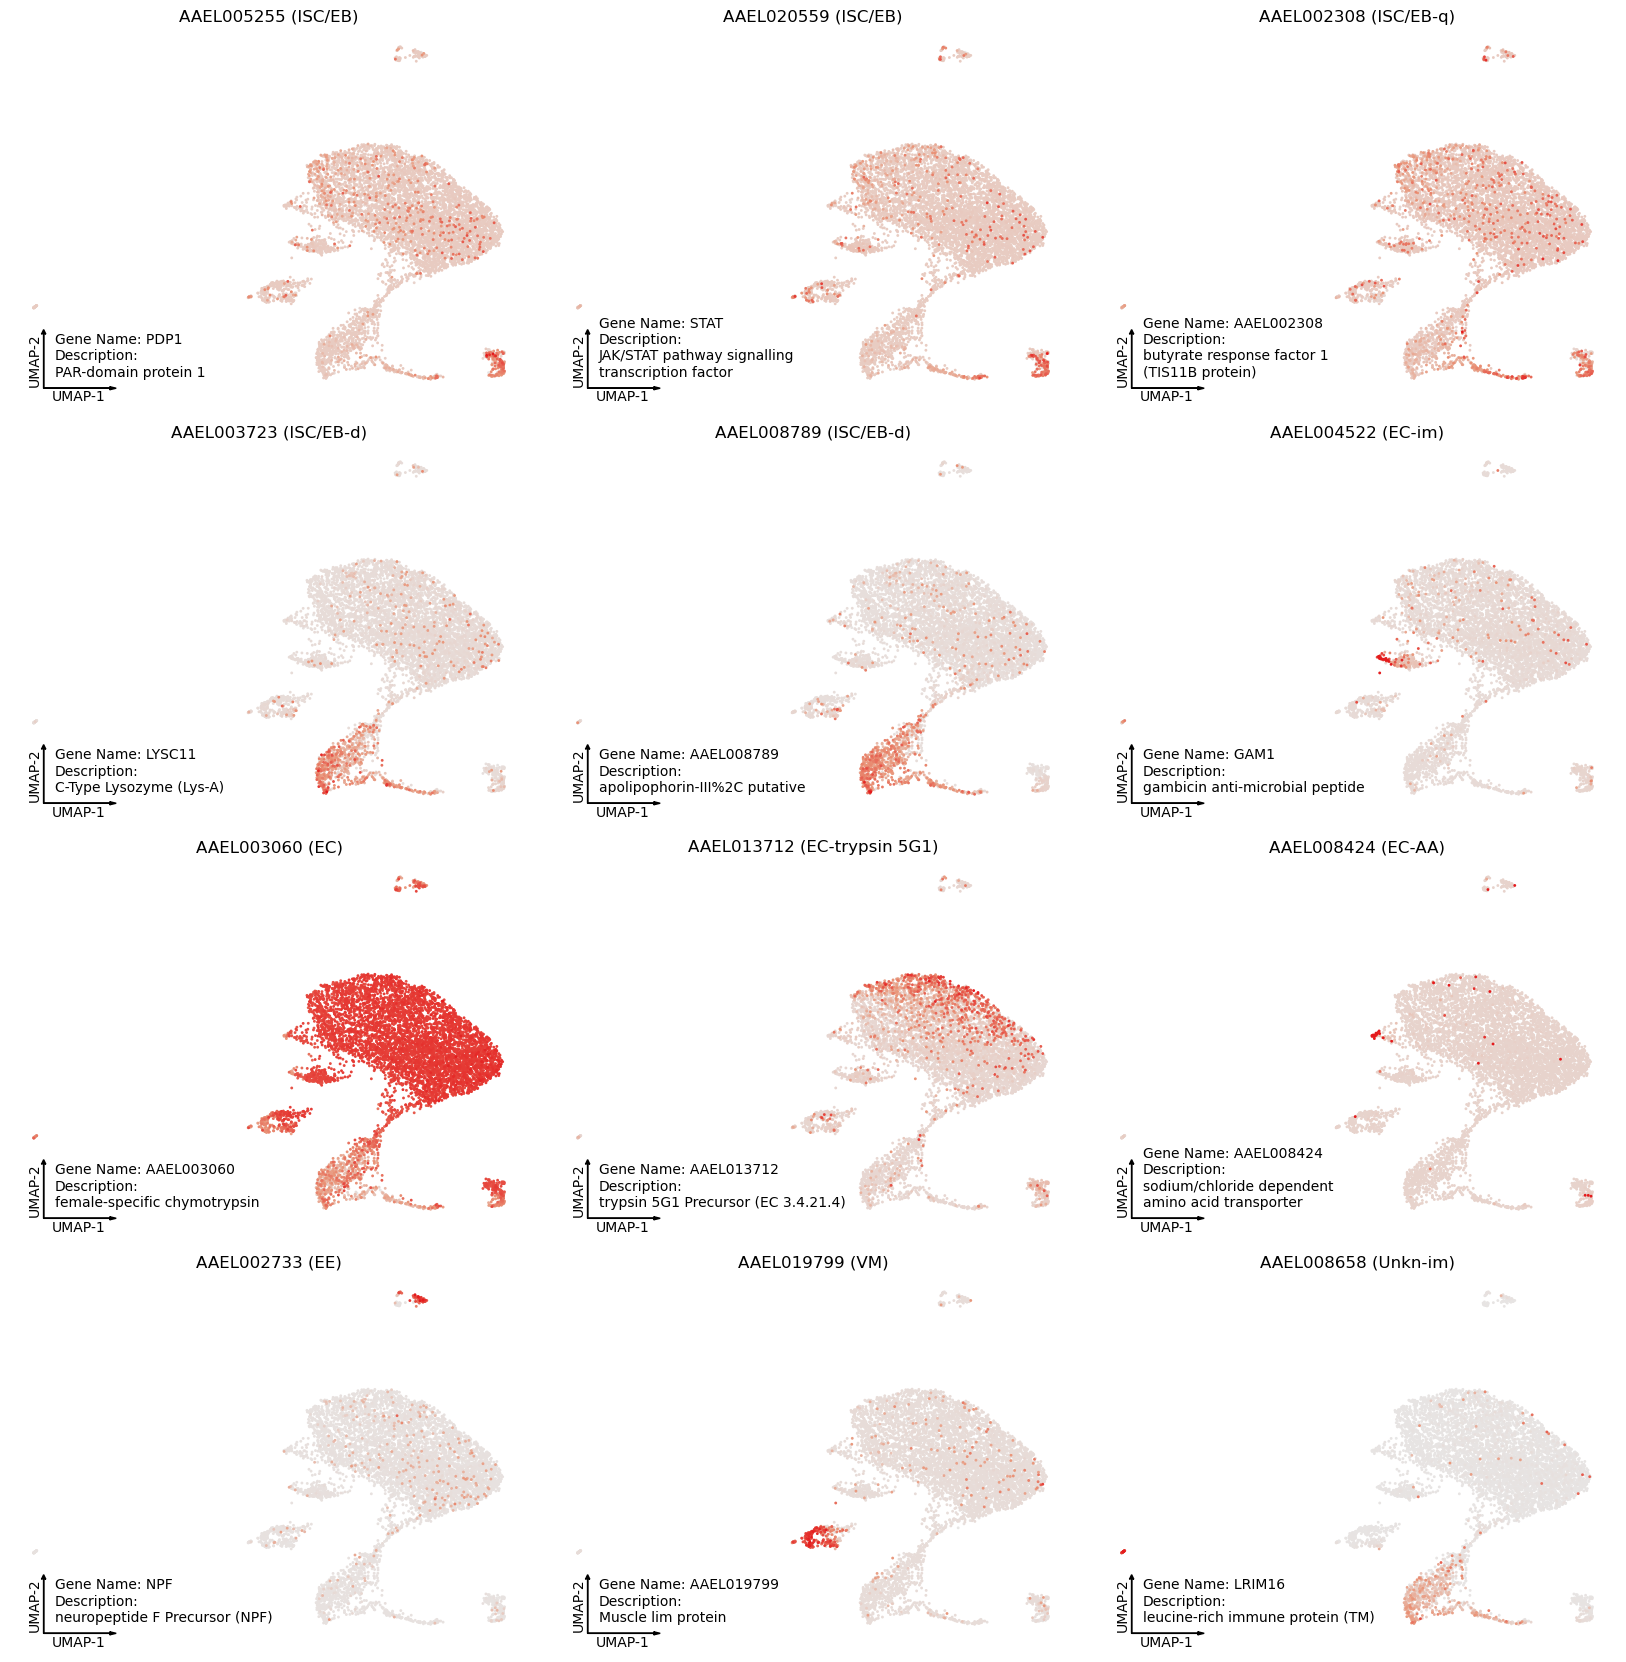

In [26]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

c = sns.color_palette('Set1')

cvals  = [-2., 0,  2]
raw_colors = ["#e7e7e7", "darksalmon", c[0]]

norm=plt.Normalize(min(cvals),max(cvals))
tuples = list(zip(map(norm,cvals), raw_colors))
cmap = colors.LinearSegmentedColormap.from_list("", tuples)

plt.figure(figsize=(7,9))

axes = sc.pl.umap(
    adata_sgl, 
    color=marks['gene'], 
    use_raw=False, 
    color_map=cmap, 
    show=False, 
    frameon=False, 
    colorbar_loc=None,
    ncols=3,
    wspace=0.05,
    hspace=0.1,
    title=marks['title'],
)

for ax, des in zip(axes, marks['des']):
    ax.arrow(
        -16, -10, 0, 3.5, 
        width=0.01, head_width=0.2, overhang=0.3, 
        color='k', zorder=10)
    ax.arrow(
        -16, -10, 3, 0, 
        width=0.01, head_width=0.2, overhang=0.3,
        color='k', zorder=10)

    ax.set_axis_off()

    ax.text(-14.4, -10.1, 'UMAP-1', ha='center', va='top')
    ax.text(-16.1, -8.1, 'UMAP-2', ha='right', va='center', rotation=90)

    if des.startswith('Gene Name: STAT'):
        des = """Gene Name: STAT
Description:
JAK/STAT pathway signalling 
transcription factor"""
    elif des.startswith('Gene Name: AAEL002308'):
        des = """Gene Name: AAEL002308
Description:
butyrate response factor 1 
(TIS11B protein)"""
    elif des.startswith('Gene Name: AAEL008424'):
        des = """Gene Name: AAEL008424
Description:
sodium/chloride dependent 
amino acid transporter"""
    
    ax.text(-15.5, -9.4, des, ha='left', va='bottom')

plt.savefig('./plots/f2.exp.umap.png', dpi=600, bbox_inches='tight')